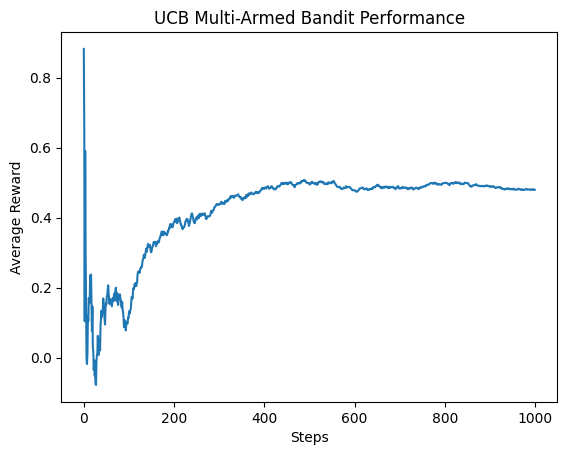

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class UCBMultiArmedBandit:
    def __init__(self, k=10, c=2):
        self.k = k  # Number of arms
        self.c = c  # UCB exploration parameter
        self.q_true = np.random.normal(0, 1, self.k)  # True values of arms
        self.q_est = np.zeros(self.k)  # Estimated values
        self.action_count = np.zeros(self.k)  # Number of times each arm was chosen
        self.time = 0  # Time step

    def select_action(self):
        self.time += 1
        if np.any(self.action_count == 0):
            return np.argmin(self.action_count)  # Ensure each action is taken at least once
        ucb_values = self.q_est + self.c * np.sqrt(np.log(self.time) / (self.action_count + 1e-5))
        return np.argmax(ucb_values)

    def update_estimate(self, action, reward):
        self.action_count[action] += 1
        step_size = 1 / self.action_count[action]
        self.q_est[action] += step_size * (reward - self.q_est[action])

    def run(self, steps=1000):
        rewards = np.zeros(steps)
        for t in range(steps):
            action = self.select_action()
            reward = np.random.normal(self.q_true[action], 1)  # Sample reward
            self.update_estimate(action, reward)
            rewards[t] = reward
        return rewards

# Run UCB Bandit Experiment
bandit = UCBMultiArmedBandit(k=10, c=2)
rewards = bandit.run(steps=1000)

# Plot results
plt.plot(np.cumsum(rewards) / (np.arange(1000) + 1))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("UCB Multi-Armed Bandit Performance")
plt.show()
